In [1]:
import time
notebookstart= time.time()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
# Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import preprocessing
from contextlib import contextmanager
import keras as ks
from keras import backend as K
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as Tfidf
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# Tf-Idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import stopwords 
from scipy.cluster.vq import kmeans2, whiten
from sklearn.decomposition import PCA
# Viz

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Input, Dropout, Dense, Embedding, SpatialDropout1D, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from numpy.random import seed
seed(666)
from tensorflow import set_random_seed
set_random_seed(666)

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print('[{' + name + '}] done in {' + str(round(time.time() - t0, 3)) + '} s')
    


Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn import metrics
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.display import HTML
import json
import altair as alt

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
train = reduce_mem_usage(pd.read_csv('input/train.csv.zip'))
test = reduce_mem_usage(pd.read_csv('input/test.csv.zip'))
mulliken = reduce_mem_usage(pd.read_csv('input/mulliken_charges.csv.zip'))
dipole = reduce_mem_usage(pd.read_csv('input/dipole_moments.csv.zip'))
structure = reduce_mem_usage(pd.read_csv('input/structures.csv.zip'))
potential = reduce_mem_usage(pd.read_csv('input/potential_energy.csv.zip'))
magnetic = reduce_mem_usage(pd.read_csv('input/magnetic_shielding_tensors.csv.zip'))
scaler = reduce_mem_usage(pd.read_csv('input/scalar_coupling_contributions.csv.zip'))
sub = reduce_mem_usage(pd.read_csv('input/sample_submission.csv.zip'))


Mem. usage decreased to 106.62 Mb (50.0% reduction)
Mem. usage decreased to 52.57 Mb (45.0% reduction)
Mem. usage decreased to 16.09 Mb (54.2% reduction)
Mem. usage decreased to  1.13 Mb (56.2% reduction)
Mem. usage decreased to 51.74 Mb (52.1% reduction)
Mem. usage decreased to  0.81 Mb (37.5% reduction)
Mem. usage decreased to 39.49 Mb (69.3% reduction)
Mem. usage decreased to 115.50 Mb (59.4% reduction)
Mem. usage decreased to 11.95 Mb (68.7% reduction)


In [5]:
train.head(10)

id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0  1JHC   
1   1  dsgdb9nsd_000001             1             2  2JHH   
2   2  dsgdb9nsd_000001             1             3  2JHH   
3   3  dsgdb9nsd_000001             1             4  2JHH   
4   4  dsgdb9nsd_000001             2             0  1JHC   
5   5  dsgdb9nsd_000001             2             3  2JHH   
6   6  dsgdb9nsd_000001             2             4  2JHH   
7   7  dsgdb9nsd_000001             3             0  1JHC   
8   8  dsgdb9nsd_000001             3             4  2JHH   
9   9  dsgdb9nsd_000001             4             0  1JHC   

   scalar_coupling_constant  
0                84.8125000  
1               -11.2578125  
2               -11.2578125  
3               -11.2578125  
4                84.8125000  
5               -11.2578125  
6               -11.2578125  
7                84.8125000  
8               -11.2578125  
9                84.8125000

In [6]:
structure.head(10)

molecule_name  atom_index atom                  x                  y  \
0  dsgdb9nsd_000001           0    C -0.012695312500000  1.085937500000000   
1  dsgdb9nsd_000001           1    H  0.002149581909180 -0.006031036376953   
2  dsgdb9nsd_000001           2    H  1.011718750000000  1.463867187500000   
3  dsgdb9nsd_000001           3    H -0.541015625000000  1.447265625000000   
4  dsgdb9nsd_000001           4    H -0.523925781250000  1.437500000000000   
5  dsgdb9nsd_000002           0    N -0.040435791015625  1.024414062500000   
6  dsgdb9nsd_000002           1    H  0.017257690429688  0.012542724609375   
7  dsgdb9nsd_000002           2    H  0.916015625000000  1.358398437500000   
8  dsgdb9nsd_000002           3    H -0.520507812500000  1.343750000000000   
9  dsgdb9nsd_000003           0    O -0.034362792968750  0.977539062500000   

                   z  
0  0.008003234863281  
1  0.001976013183594  
2  0.000276565551758  
3 -0.876464843750000  
4  0.906250000000000  
5  0.062561035156250  
6 -0.027374267578125  
7 -0.028762817382812  
8 -0.775390625000000  
9  0.007602691650391

In [7]:
magnetic.shape

(1533537, 11)

In [8]:
potential.head()

molecule_name  potential_energy
0  dsgdb9nsd_000001         -40.53125
1  dsgdb9nsd_000002         -56.56250
2  dsgdb9nsd_000003         -76.43750
3  dsgdb9nsd_000005         -93.43750
4  dsgdb9nsd_000007         -79.81250

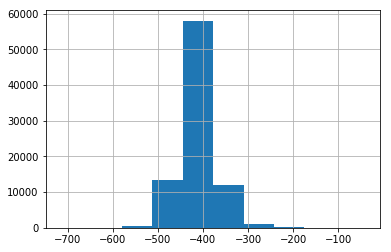

In [9]:
potential.potential_energy.hist()

In [10]:
magnetic.head()

molecule_name  atom_index          XX            YX                 ZX  \
0  dsgdb9nsd_000001           0  195.375000  0.0000000000 -0.000100016593933   
1  dsgdb9nsd_000001           1   31.343750 -1.2314453125  4.054687500000000   
2  dsgdb9nsd_000001           2   31.578125  1.2177734375 -4.148437500000000   
3  dsgdb9nsd_000001           3   31.515625  4.1093750000  1.272460937500000   
4  dsgdb9nsd_000001           4   31.406250 -4.0937500000 -1.179687500000000   

             XY          YY                 ZY                 XZ  \
0  0.0000000000  195.375000  0.000699996948242 -0.000100016593933   
1 -1.2314453125   28.953125 -1.717773437500000  4.054687500000000   
2  1.2177734375   28.906250 -1.603515625000000 -4.148437500000000   
3  4.1093750000   33.906250  1.695312500000000  1.272460937500000   
4 -4.0937500000   34.062500  1.625976562500000 -1.179687500000000   

                  YZ          ZZ  
0  0.000699996948242  195.375000  
1 -1.717773437500000   34.093750  
2 -1.603515625000000   33.906250  
3  1.695312500000000   28.953125  
4  1.625976562500000   28.906250

In [11]:
train = pd.merge(train, scaler, how = 'left',
                  left_on  = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'],
                  right_on = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])

In [12]:
y = train['scalar_coupling_constant'] / train['fc']

In [13]:
train = reduce_mem_usage(pd.read_csv('train_0.csv', index_col=0))
test = reduce_mem_usage(pd.read_csv('test_0.csv', index_col=0))

Mem. usage decreased to 746.32 Mb (75.0% reduction)
Mem. usage decreased to 391.87 Mb (75.6% reduction)


In [14]:
train_1 = reduce_mem_usage(pd.read_csv('train_1.csv', index_col=0))
test_1 = reduce_mem_usage(pd.read_csv('test_1.csv', index_col=0))

Mem. usage decreased to 315.41 Mb (73.1% reduction)
Mem. usage decreased to 169.65 Mb (73.1% reduction)


In [15]:
fs0 = [f for f in train_1.columns if f not in train.columns]
fs0

['c_x',
 'c_y',
 'c_z',
 'x_closest_0',
 'y_closest_0',
 'z_closest_0',
 'x_closest_1',
 'y_closest_1',
 'z_closest_1',
 'distance',
 'distance_center0',
 'distance_center1',
 'distance_c0',
 'distance_c1',
 'distance_f0',
 'distance_f1',
 'cos_c0_c1',
 'cos_f0_f1',
 'cos_center0_center1',
 'cos_c0',
 'cos_c1',
 'cos_f0',
 'cos_f1',
 'cos_center0',
 'cos_center1',
 'atom_n']

In [16]:
train_3 = reduce_mem_usage(pd.read_csv('input/train_giba.csv', index_col=None))
test_3 = reduce_mem_usage(pd.read_csv('input/test_giba.csv', index_col=None))

Mem. usage decreased to 910.68 Mb (71.8% reduction)
Mem. usage decreased to 501.79 Mb (71.2% reduction)


In [17]:
fs1 = [f for f in train_3.columns if f not in (train.columns.tolist() + fs0)]
fs1

['molecule_name',
 'id',
 'scalar_coupling_constant',
 'ID',
 'structure_atom_0',
 'structure_x_0',
 'structure_y_0',
 'structure_z_0',
 'structure_atom_1',
 'structure_x_1',
 'structure_y_1',
 'structure_z_1',
 'typei',
 'N1',
 'N2',
 'link0',
 'link1',
 'linkN',
 'dist_xyz',
 'inv_dist0',
 'inv_dist1',
 'inv_distP',
 'R0',
 'R1',
 'E0',
 'E1',
 'inv_dist0R',
 'inv_dist1R',
 'inv_distPR',
 'inv_dist0E',
 'inv_dist1E',
 'inv_distPE',
 'linkM0',
 'linkM1',
 'min_molecule_atom_0_dist_xyz',
 'mean_molecule_atom_0_dist_xyz',
 'max_molecule_atom_0_dist_xyz',
 'sd_molecule_atom_0_dist_xyz',
 'min_molecule_atom_1_dist_xyz',
 'mean_molecule_atom_1_dist_xyz',
 'max_molecule_atom_1_dist_xyz',
 'sd_molecule_atom_1_dist_xyz',
 'molecule_name.1',
 'atom_index_1.1',
 'coulomb_C.x',
 'coulomb_F.x',
 'coulomb_H.x',
 'coulomb_N.x',
 'coulomb_O.x',
 'yukawa_C.x',
 'yukawa_F.x',
 'yukawa_H.x',
 'yukawa_N.x',
 'yukawa_O.x',
 'coulomb_C.y',
 'coulomb_F.y',
 'coulomb_H.y',
 'coulomb_N.y',
 'coulomb_O.y',
 '

In [18]:
train = pd.concat([train, train_1[fs0], train_3[fs1]], axis=1)
test = pd.concat([test, test_1[fs0], test_3[fs1]], axis=1)


In [19]:
train_type = pd.read_csv('input/train.csv.zip', usecols=['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])
test_type = pd.read_csv('input/test.csv.zip', usecols=['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])

train['type'] = train_type.type
test['type'] = test_type.type

train['molecule_name'] = train_type.molecule_name
test['molecule_name'] = test_type.molecule_name


In [20]:
train['atom_index_0'] = train_type.atom_index_0
test['atom_index_0'] = test_type.atom_index_0

train['atom_index_1'] = train_type.atom_index_1
test['atom_index_1'] = test_type.atom_index_1


In [21]:
train = pd.merge(train, scaler, how = 'left',
                  left_on  = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'],
                  right_on = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])

In [22]:
train_babel_feat = pd.read_csv('input/train_ob_charges.csv')
test_babel_feat = pd.read_csv('input/test_ob_charges.csv')


In [23]:
train_babel_feat.shape

(1533537, 15)

In [24]:
train_babel_feat['atom_index_0'] = train_babel_feat.atom_index
train_babel_feat['atom_index_1'] = train_babel_feat.atom_index

test_babel_feat['atom_index_0'] = test_babel_feat.atom_index
test_babel_feat['atom_index_1'] = test_babel_feat.atom_index


In [25]:
bfs =  ['molecule_name', 'atom_index_0'] + ['eem', 'qtpie']

In [26]:
train = train.merge(train_babel_feat[bfs], how = 'left', 
                 on=['molecule_name', 'atom_index_0'])

bfs =  ['molecule_name', 'atom_index_1'] + ['eem', 'qtpie']
train = train.merge(train_babel_feat[bfs], how = 'left', 
                 on=['molecule_name', 'atom_index_1'])

In [27]:

bfs =  ['molecule_name', 'atom_index_0'] + ['eem', 'qtpie']
test = test.merge(test_babel_feat[bfs], how = 'left', 
                 on=['molecule_name', 'atom_index_0'])


In [28]:
bfs =  ['molecule_name', 'atom_index_1'] + ['eem', 'qtpie']
test = test.merge(test_babel_feat[bfs], how = 'left', 
                 on=['molecule_name', 'atom_index_1'])

In [29]:
train.head()

atom_index_0  atom_index_1  type  atom_index_x  atom_0               x_0  \
0             1             0  1JHC             1       0  0.00214958190918   
1             1             2  2JHH             1       0  0.00214958190918   
2             1             3  2JHH             1       0  0.00214958190918   
3             1             4  2JHH             1       0  0.00214958190918   
4             2             0  1JHC             2       0  1.01171875000000   

                 y_0                z_0        EN_x           rad_x  ...  NF  \
0 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ... NaN   
1 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ... NaN   
2 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ... NaN   
3 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ... NaN   
4  1.463867187500000  0.000276565551758  2.19921875  0.429931640625  ... NaN   

   NO        fc              sd           pso            dso  \
0 NaN  83.00000  0.254638671875  1.2587890625  0.27197265625   
1 NaN -11.03125  0.353027343750  2.8574218750 -3.43359375000   
2 NaN -11.03125  0.353027343750  2.8593750000 -3.43359375000   
3 NaN -11.03125  0.353027343750  2.8593750000 -3.43359375000   
4 NaN  83.00000  0.254638671875  1.2587890625  0.27197265625   

               eem_x            qtpie_x              eem_y            qtpie_y  
0  0.161131359327947  0.773439349698371 -0.644530825087479 -3.093806799641671  
1  0.161131359327947  0.773439349698371  0.161131811379221  0.773442481023162  
2  0.161131359327947  0.773439349698371  0.161133990721081  0.773463412039650  
3  0.161131359327947  0.773439349698371  0.161133663659230  0.773461556880489  
4  0.161131811379221  0.773442481023162 -0.644530825087479 -3.093806799641671  

[5 rows x 205 columns]

In [30]:
train['q_0'] = train['eem_x'] * train['eem_y'] / train['dist'] ** 2
test['q_0'] = test['eem_x'] * test['eem_y'] / test['dist'] ** 2

train['q_1'] = train['qtpie_x'] * train['qtpie_y'] / train['dist'] ** 2
test['q_1'] = test['qtpie_x'] * test['qtpie_y'] / test['dist'] ** 2

In [31]:
scaler.columns

Index(['molecule_name', 'atom_index_0', 'atom_index_1', 'type', 'fc', 'sd',
       'pso', 'dso'],
      dtype='object')

In [32]:
train_p_0 = train[['x_0', 'y_0', 'z_0']].values
train_p_1 = train[['x_1', 'y_1', 'z_1']].values
test_p_0 = test[['x_0', 'y_0', 'z_0']].values
test_p_1 = test[['x_1', 'y_1', 'z_1']].values

In [33]:
train['dist_0'] = np.linalg.norm(train_p_0 + train_p_1, axis=1)
test['dist_0'] = np.linalg.norm(test_p_0 + test_p_1, axis=1)

train['dist_1'] = np.max(train_p_0 * train_p_1, axis=1)
test['dist_1'] = np.max(test_p_0 * test_p_1, axis=1)

train['dist_2'] = np.min(train_p_0 * train_p_1, axis=1)
test['dist_2'] = np.min(test_p_0 * test_p_1, axis=1)

train['dist_3'] = np.var(train_p_0 * train_p_1, axis=1)
test['dist_3'] = np.var(test_p_0 * test_p_1, axis=1)

In [34]:
train['m_0'] = train.groupby(['molecule_name', 'atom_index_0'])['dist_2'].transform('max')
test['m_0'] = train.groupby(['molecule_name', 'atom_index_0'])['dist_2'].transform('max')

train['d_0'] = np.max(np.abs(train_p_0 - train_p_1), axis=1)
test['d_0'] = np.max(np.abs(test_p_0 - test_p_1), axis=1)


In [35]:
train_2 = reduce_mem_usage(pd.read_csv('input/train_2.csv', index_col=0))
test_2 = reduce_mem_usage(pd.read_csv('input/test_2.csv', index_col=0))

Mem. usage decreased to 524.20 Mb (78.0% reduction)
Mem. usage decreased to 281.96 Mb (78.0% reduction)


In [36]:
train_2.head()

id     molecule_name  atom_index_0  atom_index_1  type atom1 atom2  type0  \
0   0  dsgdb9nsd_000001             1             0  1JHC     H     C      0   
1   1  dsgdb9nsd_000001             1             2  2JHH     H     H      1   
2   2  dsgdb9nsd_000001             1             3  2JHH     H     H      1   
3   3  dsgdb9nsd_000001             1             4  2JHH     H     H      1   
4   4  dsgdb9nsd_000001             2             0  1JHC     H     C      0   

   type1  type2  ...  a1_nb_inring8  a1_nb_nb_h  a1_nb_nb_o  a1_nb_nb_c  \
0      0      0  ...              0           0           0           1   
1      0      0  ...              0           4           0           0   
2      0      0  ...              0           4           0           0   
3      0      0  ...              0           4           0           0   
4      0      0  ...              0           0           0           1   

   a1_nb_nb_n  a1_nb_nb_na        x_a1_nb    y_a1_nb            z_a1_nb  \
0           0            0 -0.52392578125  1.4375000  0.906250000000000   
1           0            0 -0.01269531250  1.0859375  0.008003234863281   
2           0            0 -0.01269531250  1.0859375  0.008003234863281   
3           0            0 -0.01269531250  1.0859375  0.008003234863281   
4           0            0 -0.52392578125  1.4375000  0.906250000000000   

   dist_to_type_mean  
0       0.9990234375  
1       1.0048828125  
2       1.0048828125  
3       1.0048828125  
4       0.9990234375  

[5 rows x 66 columns]

In [37]:
train_2.drop(labels=['atom_index_0', 'atom_index_1' ,'type' ,'atom1', 'atom2', 'id'], axis=1, inplace=True)
test_2.drop(labels=['atom_index_0', 'atom_index_1' ,'type' ,'atom1', 'atom2', 'id'], axis=1, inplace=True)

In [38]:
fs2 = [f for f in train_2.columns if f not in train.columns]
fs2

['type0',
 'type1',
 'type2',
 'type3',
 'x0',
 'y0',
 'z0',
 'x1',
 'y1',
 'z1',
 'a1_degree',
 'a1_hybridization',
 'a1_inring',
 'a1_inring3',
 'a1_inring4',
 'a1_inring5',
 'a1_inring6',
 'a1_inring7',
 'a1_inring8',
 'a1_nb_h',
 'a1_nb_o',
 'a1_nb_c',
 'a1_nb_n',
 'a1_nb_na',
 'a0_nb_degree',
 'a0_nb_hybridization',
 'a0_nb_inring',
 'a0_nb_inring3',
 'a0_nb_inring4',
 'a0_nb_inring5',
 'a0_nb_inring6',
 'a0_nb_inring7',
 'a0_nb_inring8',
 'a0_nb_nb_h',
 'a0_nb_nb_o',
 'a0_nb_nb_c',
 'a0_nb_nb_n',
 'a0_nb_nb_na',
 'x_a0_nb',
 'y_a0_nb',
 'z_a0_nb',
 'a1_nb_degree',
 'a1_nb_hybridization',
 'a1_nb_inring',
 'a1_nb_inring3',
 'a1_nb_inring4',
 'a1_nb_inring5',
 'a1_nb_inring6',
 'a1_nb_inring7',
 'a1_nb_inring8',
 'a1_nb_nb_h',
 'a1_nb_nb_o',
 'a1_nb_nb_c',
 'a1_nb_nb_n',
 'a1_nb_nb_na',
 'x_a1_nb',
 'y_a1_nb',
 'z_a1_nb',
 'dist_to_type_mean']

In [39]:
train = pd.concat([train, train_2[fs2]], axis=1)
test = pd.concat([test, test_2[fs2]], axis=1)


In [40]:
np.unique(train['type'])

array(['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype=object)

In [41]:
del train_1, train_2
del test_1, test_2

gc.collect()

109

In [42]:
def metric(df, preds):
    df["prediction"] = preds
    maes = []
    for t in df.type.unique():
        y_true = df[df.type==t].scalar_coupling_constant.values
        y_pred = df[df.type==t].prediction.values
        mae = np.log(metrics.mean_absolute_error(y_true, y_pred))
        maes.append(mae)
    return np.mean(maes)
#df for evaluate
eval_df = pd.DataFrame({"type": train["type"]})
eval_df["scalar_coupling_constant"] = y

In [43]:
train.head()

atom_index_0  atom_index_1  type  atom_index_x  atom_0               x_0  \
0             1             0  1JHC             1       0  0.00214958190918   
1             1             2  2JHH             1       0  0.00214958190918   
2             1             3  2JHH             1       0  0.00214958190918   
3             1             4  2JHH             1       0  0.00214958190918   
4             2             0  1JHC             2       0  1.01171875000000   

                 y_0                z_0        EN_x           rad_x  ...  \
0 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ...   
1 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ...   
2 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ...   
3 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ...   
4  1.463867187500000  0.000276565551758  2.19921875  0.429931640625  ...   

   a1_nb_inring8  a1_nb_nb_h  a1_nb_nb_o  a1_nb_nb_c  a1_nb_nb_n  a1_nb_nb_na  \
0              0           0           0           1           0            0   
1              0           4           0           0           0            0   
2              0           4           0           0           0            0   
3              0           4           0           0           0            0   
4              0           0           0           1           0            0   

         x_a1_nb    y_a1_nb            z_a1_nb  dist_to_type_mean  
0 -0.52392578125  1.4375000  0.906250000000000       0.9990234375  
1 -0.01269531250  1.0859375  0.008003234863281       1.0048828125  
2 -0.01269531250  1.0859375  0.008003234863281       1.0048828125  
3 -0.01269531250  1.0859375  0.008003234863281       1.0048828125  
4 -0.52392578125  1.4375000  0.906250000000000       0.9990234375  

[5 rows x 272 columns]

In [77]:
mulliken['atom_index_1'] = mulliken.atom_index

In [79]:
# del train['mulliken_charge'], test['mulliken_charge']

In [80]:
train = train.merge(mulliken, on=['atom_index_1', 'molecule_name'], how='left')
test = test.merge(mulliken, on=['atom_index_1', 'molecule_name'], how='left')

gc.collect()

2529

In [81]:
y = train['scalar_coupling_constant'] * train['mulliken_charge']

In [82]:
y.head()

0   -45.4375000
1    -1.5078125
2    -1.5078125
3    -1.5078125
4   -45.4375000
dtype: float16

In [83]:
train.shape

(4658147, 276)

In [84]:
# for f in ['structure_atom_0', 'structure_atom_1', 'molecule_name.1']:
#     train[f] = train[f].astype('category')
#     test[f] = test[f].astype('category')

In [85]:
from catboost import Pool, CatBoostClassifier, CatBoostRegressor



In [ ]:
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
n_split = 5
kf = KFold(n_splits=n_split, random_state=666, shuffle=True)
    
for type_ in np.unique(train['type']):

    
    train_ = train[train['type'] == type_]
    test_ = test[test['type'] == type_]
    
    train_index = train_.index
    test_index = test_.index
    
    y_ = y[train['type'] == type_]
    
    features = [c for c in train_.columns if c not in ['id', 'molecule_name', 'x_0', 'y_0', 'z_0',
                                                       'structure_atom_0', 'structure_atom_1', 'molecule_name.1',
                                                       'x_1', 'y_1', 'z_1', 'atom_index', 'atom_index_x',
                                                       'type', 'scalar_coupling_constant', 'fc', 'dso', 'sd', 'pso',
                                                       'atom_0', 'atom_1']]
    for i, (train_idx, valid_idx) in enumerate(kf.split(train_)):  
        print(f'Fold {i + 1}')
        x_train = train_[features]
        y_train = y_
        
        clf = CatBoostRegressor(loss_function="MAE",
                           eval_metric="MAE",
                           task_type="GPU",
                           learning_rate=0.4,
                           iterations=10000,
                           l2_leaf_reg=10,
                           random_seed=666,
                           od_type="Iter",
                           depth=5,
                           early_stopping_rounds=50,
                           border_count=96
                           #has_time= True 
                          )
        clf.fit(x_train.iloc[train_idx], y_train.iloc[train_idx],
             eval_set=(x_train.iloc[valid_idx], y_train.iloc[valid_idx]),
             use_best_model=True,
             verbose=50,
             plot=True)
        
        oof[train_index[valid_idx]] = clf.predict(x_train.iloc[valid_idx])

        predictions[test_index] += clf.predict(test_[features]) / n_split

    
#print("CV score: {:<8.5f}".format(metric(eval_df, oof)))

Fold 1


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 23.5678640	test: 23.6278615	best: 23.6278615 (0)	total: 8.01ms	remaining: 1m 20s
50:	learn: 14.6195201	test: 14.6722648	best: 14.6722648 (50)	total: 301ms	remaining: 58.7s
100:	learn: 7.8581877	test: 7.9140204	best: 7.9140204 (100)	total: 577ms	remaining: 56.6s
150:	learn: 3.3768149	test: 3.4320012	best: 3.4320012 (150)	total: 871ms	remaining: 56.8s
200:	learn: 1.5401840	test: 1.5862296	best: 1.5862296 (200)	total: 1.15s	remaining: 56.2s
250:	learn: 1.1164662	test: 1.1489921	best: 1.1489921 (250)	total: 1.42s	remaining: 55.3s
300:	learn: 0.9076518	test: 0.9317893	best: 0.9317893 (300)	total: 1.71s	remaining: 55s
350:	learn: 0.7339135	test: 0.7501825	best: 0.7501825 (350)	total: 1.98s	remaining: 54.5s
400:	learn: 0.5943724	test: 0.6035598	best: 0.6035598 (400)	total: 2.26s	remaining: 54.2s
450:	learn: 0.5098869	test: 0.5156250	best: 0.5156250 (450)	total: 2.54s	remaining: 53.8s
500:	learn: 0.4797974	test: 0.4849164	best: 0.4849164 (500)	total: 2.83s	remaining: 53.6s
550:	learn

4500:	learn: 0.2859135	test: 0.3273661	best: 0.3273598 (4496)	total: 26s	remaining: 31.8s
4550:	learn: 0.2852321	test: 0.3271207	best: 0.3271091 (4547)	total: 26.3s	remaining: 31.5s
4600:	learn: 0.2845932	test: 0.3268562	best: 0.3268562 (4600)	total: 26.6s	remaining: 31.2s
4650:	learn: 0.2839930	test: 0.3266406	best: 0.3266403 (4646)	total: 26.9s	remaining: 30.9s
4700:	learn: 0.2834202	test: 0.3264936	best: 0.3264914 (4699)	total: 27.2s	remaining: 30.6s
4750:	learn: 0.2828614	test: 0.3263080	best: 0.3263080 (4750)	total: 27.5s	remaining: 30.3s
4800:	learn: 0.2822826	test: 0.3261861	best: 0.3261719 (4794)	total: 27.8s	remaining: 30.1s
4850:	learn: 0.2816743	test: 0.3259056	best: 0.3259056 (4850)	total: 28s	remaining: 29.8s
4900:	learn: 0.2810782	test: 0.3256946	best: 0.3256825 (4898)	total: 28.3s	remaining: 29.5s
4950:	learn: 0.2805181	test: 0.3255574	best: 0.3255574 (4950)	total: 28.6s	remaining: 29.2s
5000:	learn: 0.2799448	test: 0.3252922	best: 0.3252922 (5000)	total: 28.9s	remaining

In [ ]:
predictions

In [ ]:
train.head()

In [ ]:
predictions

In [ ]:
test.shape

In [ ]:
sub = pd.read_csv('input/sample_submission.csv.zip')

In [ ]:
sub.head()

In [ ]:
sub.shape

In [ ]:
len(predictions)

In [ ]:
sub['scalar_coupling_constant'] = predictions

sub.to_csv("submission-gpu-catb-v0.1.0-0.csv", index=False)

In [ ]:
sub['scalar_coupling_constant'].hist()

In [ ]:
pd.DataFrame(oof).to_csv('oofs/validation_catb_gpu_v0.1.0-0.csv', index=False)
pd.DataFrame(predictions).to_csv('oofs/test_catb_gpu_v0.1.0-0.csv', index=False)

In [54]:
np.sum(train['fc'] == 0)

1

In [56]:
train[train['fc'] == 0][['fc', 'scalar_coupling_constant', 'sd']]

fc  scalar_coupling_constant                 sd
281263  0.0         0.003387451171875  0.045196533203125

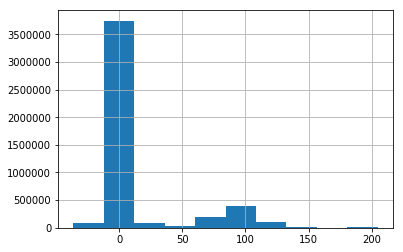

In [57]:
train.scalar_coupling_constant.hist()

In [58]:
np.unique(train['type'])

array(['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype=object)

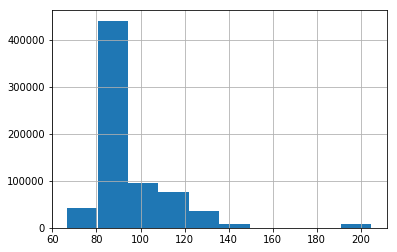

In [59]:
train[train['type']=='1JHC'].scalar_coupling_constant.hist()

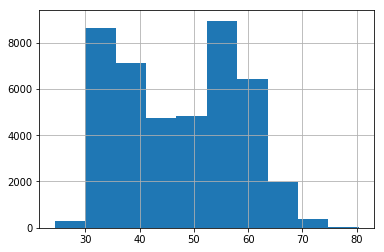

In [60]:
train[train['type']=='1JHN'].scalar_coupling_constant.hist()

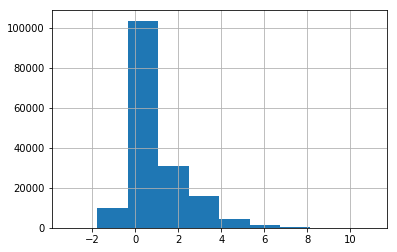

In [61]:
train[train['type']=='3JHN'].scalar_coupling_constant.hist()

In [66]:
mulliken.head()

molecule_name  atom_index  mulliken_charge  atom_index_0
0  dsgdb9nsd_000001           0 -0.5356445312500             0
1  dsgdb9nsd_000001           1  0.1339111328125             1
2  dsgdb9nsd_000001           2  0.1339111328125             2
3  dsgdb9nsd_000001           3  0.1339111328125             3
4  dsgdb9nsd_000001           4  0.1339111328125             4

In [68]:
train.merge(mulliken, on=['atom_index_0', 'molecule_name'], how='left')

atom_index_0  atom_index_1  type  atom_index_x  atom_0  \
0                   1             0  1JHC             1       0   
1                   1             2  2JHH             1       0   
2                   1             3  2JHH             1       0   
3                   1             4  2JHH             1       0   
4                   2             0  1JHC             2       0   
5                   2             3  2JHH             2       0   
6                   2             4  2JHH             2       0   
7                   3             0  1JHC             3       0   
8                   3             4  2JHH             3       0   
9                   4             0  1JHC             4       0   
10                  1             0  1JHN             1       0   
11                  1             2  2JHH             1       0   
12                  1             3  2JHH             1       0   
13                  2             0  1JHN             2       0   
14                  2             3  2JHH             2       0   
15                  3             0  1JHN             3       0   
16                  1             2  2JHH             1       0   
17                  2             0  1JHC             2       0   
18                  2             1  2JHN             2       0   
19                  2             0  1JHC             2       0   
20                  2             1  2JHC             2       0   
21                  2             3  2JHH             2       0   
22                  2             4  2JHH             2       0   
23                  2             5  3JHH             2       0   
24                  2             6  3JHH             2       0   
25                  2             7  3JHH             2       0   
26                  3             0  1JHC             3       0   
27                  3             1  2JHC             3       0   
28                  3             4  2JHH             3       0   
29                  3             5  3JHH             3       0   
...               ...           ...   ...           ...     ...   
4658117            14             6  2JHC            14       0   
4658118            14             7  3JHC            14       0   
4658119            14             8  3JHC            14       0   
4658120            14            15  2JHH            14       0   
4658121            15             0  3JHC            15       0   
4658122            15             2  3JHC            15       0   
4658123            15             3  3JHC            15       0   
4658124            15             4  2JHC            15       0   
4658125            15             5  1JHC            15       0   
4658126            15             6  2JHC            15       0   
4658127            15             7  3JHC            15       0   
4658128            15             8  3JHC            15       0   
4658129            16             0  3JHC            16       0   
4658130            16             1  2JHN            16       0   
4658131            16             2  3JHC            16       0   
4658132            16             3  3JHC            16       0   
4658133            16             4  3JHC            16       0   
4658134            16             5  3JHC            16       0   
4658135            16             6  2JHC            16       0   
4658136            16             7  1JHC            16       0   
4658137            16             8  2JHC            16       0   
4658138            16            17  3JHH            16       0   
4658139            17             1  3JHN            17       0   
4658140            17             2  3JHC            17       0   
4658141            17             3  2JHC            17       0   
4658142            17             4  2JHC            17       0   
4658143            17             5  3JHC            17       0   
4658144            17             6  3JHC            17 